# 1. random forest 

## 1. 데이터 불러오기 

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing_data = fetch_california_housing()
df = pd.DataFrame(np.c_[housing_data.data, housing_data.target], columns=housing_data.feature_names + ["target"])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. 데이터 요약 통계

In [12]:
# 데이터의 분포
# 데이터 분포의 차이가 심하다. 특히 HouseAge,Population,Latitude,Longitude 변수들의 범위는 매우 크다.
# 따라서 정규화 과정이 필요하다. 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
# 데이터의 정보 
#  AveRooms, AveBedrms 은 이산형 설명변수이다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# 데이터의 구조 
df.shape

(20640, 9)

## 3. 데이터의 결측값 확인 

In [40]:
# 결측값이 존재하지 않는다. 
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## 4. 변수 간의 상관관계 파악하기 
- 아래의 각 변수간 상관관계 값을 보면 대체적으로 상관계수가 0.3~0.5 사이로 설명변수간 어느정도 약한 상관관계가 존재함을 알 수 있다. 그러나 설명변수 (crim,rad),(crim,tax),(crim,lstat),(zn,age),(zn,dis),(zn.indus),(indus.lstat),(indus,nox),(indus,dis),(indus,tax) 등등 0.5이상의 상관계수를 가지는 설명변수들도 많았다, 이는나중에 회귀모형에서 이 설명변수들 간에는 다중공선성 문제가 발생할 수도 있음을 암시한다. 따라서 회귀 분석시 모형에 대한 VIF를 반드시 구해서 다중공선성 여부를 확인해야한다. 

### 상관관계 
- -0.3~0.3 : 약한 상관관계
- -0.7~+0.7 : 강한 상관관계 

 #### 상관관계 주의사항 
- 연속형 데이터에서만 상관관계 분석이 가능함
- 증가하는 방향성에 대한 것이지. 인과관계를 의미하지 않음 

 #### 상관관계 식 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/43219265dc2c827cb4f5b34f2e3fb797bed2e820" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.171ex; widtㅠ
h:30.331ex; height:6.009ex;" alt="{\displaystyle \rho _{X,Y}={\frac {\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})]}{\sigma _{X}\sigma _{Y}}}}">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/435a23c499a2450f0752112e69a9b808336a7cce" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -4.671ex; width:47.85ex; height:8.509ex;" alt="{\displaystyle r_{xy}={\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.}">

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df.corr().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
target,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


<Figure size 432x432 with 0 Axes>

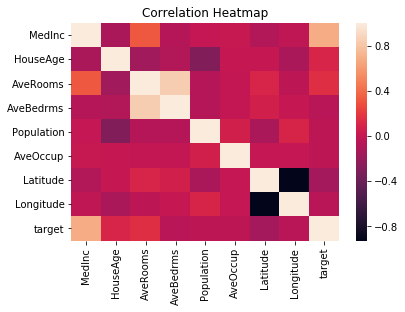

<Figure size 432x432 with 0 Axes>

In [23]:
fig = sns.heatmap(df.corr())
plt.title("Correlation Heatmap")
plt.figure(figsize=(6,6))

## 5. 분석 목적에 맞게 데이터 준비하기 

In [62]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [63]:
# target 변수를 제외한 설명변수만 존재하는 데이터 set 만들기 
X = df.iloc[:, :-1]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [64]:
# target 변수 데이터 
y = df.iloc[:, -1]
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [65]:
# 데이터 구조 확인 
df.shape

(20640, 9)

## 6.  RandomForest 모형 적합 
- train(80%) vs test(20%)으로 분리
#### 중요 하이퍼 파라미터
- n_estimators= 하위 decision tree 모델의 개수 
- max_features = 0~1사이의 값 (default=auto, 모든 변수 개수의 제곱근 값을 의미) 
- max_depth = decision tree의 최대 깊이 값, 값이 증가할수록 학습을 잘하는 대신 일반화 성능이 떨어질 수 있다. 
- max_leaf_nodes = tree의 마지막 노드의 개수 
- min_samples_split=각 노드의 분기 시, 최소 샘플의 개수 

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
from sklearn.ensemble import RandomForestRegressor
# n_estimator : default: 100, The number of trees in the forest.
reg = RandomForestRegressor()
reg = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state=123, n_jobs = -1) 
                            # n_jobs = default=1,적합성과 예측 모두에 대해 병렬로 실행할 작업의 수,  -1일 경우, 작업 수는 코어 수로 설정 
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

## 7. 모델 평가
- train data의 mse=  , $R^2$=  
- test data의 mse=  , $R^2$=
- train data가 더 target을 잘 분류 


In [35]:
from sklearn.metrics import mean_squared_error as mse
y_pred = reg.predict(X_test)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, reg.predict(X_train)), mse(y_test, y_pred)))

Mean Squared error on training data --> 0.033998037548409875
Mean Squared error on test data --> 0.24600298151770789


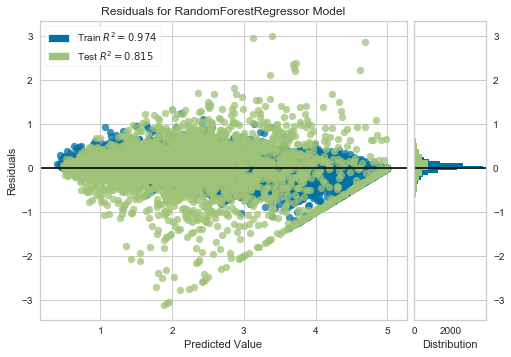

In [37]:
# conda install -c districtdatalabs yellowbrick 로 아나콘다 창에서 설치 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

### 잔차검증 
: 최종모형의 잔차검정 결과 모형의 선형성을 만족하는 것 외에 나머지 부분에서는 잔차검즘이 유의하지 않았다. 따라서 위에서 여러 통계량값이 유의다고 해서 모형 자체가 절대적으로 유의하다 확신할 수 없음을 알 수 있다. 

#### 1. 모형의 선형성 
아래 잔차에서는 패턴이 존재하지 않고 거의 일직선의 형태를 띄었다. 이는 모형의 선형성을 만족했다는 결과이다. 

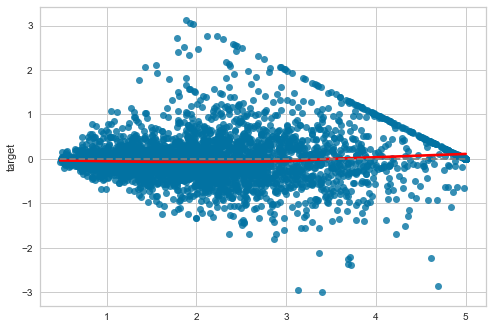

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fitted = y_pred # 예측값 
residual = y_test - fitted  # 잔차=실제값-예측값 

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')


#### 2. 잔차의 정규성 
: 잔차가 정규분포를 따른다는 가정 
-  p-= 0.0 로 유의수준 5%에서 잔차의 정규성은 위반되었다. 

(0.8900139927864075, 0.0)


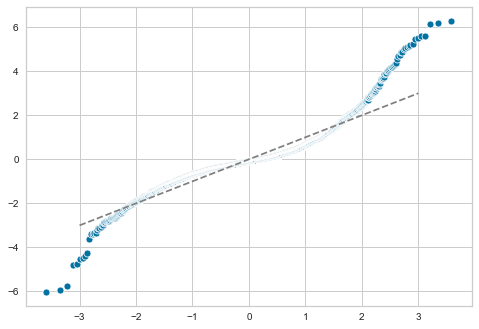

In [69]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
print(scipy.stats.shapiro(residual))

#### 3. 잔차의 등분산성 
:회귀모형을 통해 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 수평선을 그리지 못하므로 잔차의 등분산성은 만족하지 못한다.

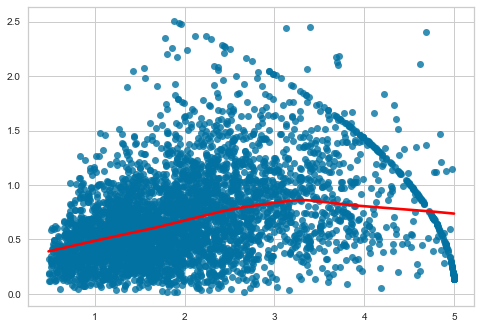

In [70]:
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

[yellowbrick](https://www.scikit-yb.org/en/latest/api/regressor/)

## 8. 모델 개선
#### 교차검증 5회 
-  max_depth=[3,4,5,6,7] , n_estimators=[10,50,100,1000] 의 각 파라미터 조합을 5회 반복 실시
- 더 높은 성능을 위해, 하이퍼 파라메타 값을 조정하며, 모델을 개선시켰지만, 여전히 초기 설정한 모델의 성능이 제일 좋았다.

In [99]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
estimator=RandomForestRegressor(),
param_grid={
'max_depth': range(3,7),
'n_estimators': (10, 50, 100, 1000),
},
cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1) 
  
grid_result = gs.fit(X_train, y_train)
best_params = grid_result.best_params_
random_forest = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,verbose=False) 
                                     
random_forest.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error as mse
y_pred_test = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_pred_train), mse(y_test, y_pred_test)))

Mean Squared error on training data --> 4.266865586317644
Mean Squared error on test data --> 20.586713061892514


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
# 최고의 성능을 가지는 하이퍼 파라메타 조합
print(best_params)

{'max_depth': 6, 'n_estimators': 50}


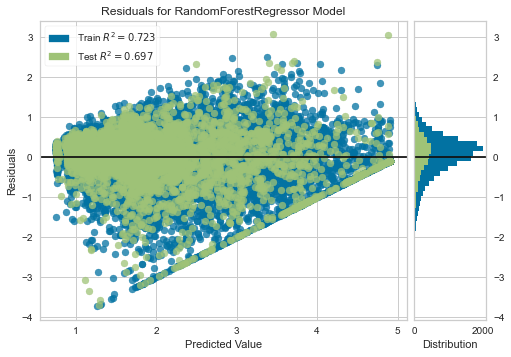

In [33]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(random_forest)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

# -------------------------------------------------------------


# 2. Xgboost

## 데이터 불러오기

In [46]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['price'] = boston.target

## 데이터 요약통계

In [49]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [50]:
# 데이터 분포
# 각 변수의 값들의 분포의 차이가 많이 난다. 정규화할 필요가 있다. 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [52]:
# 데이터 구조 확인 
data.shape

(506, 14)

## 데이터 준비하기

In [77]:
X, y = data.iloc[:, :-1], data.iloc[:,-1]

In [78]:
data_dmatrix = xgb.DMatrix(data=X, label = y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


###  Xgboost 모형 적합 
- train(80%) vs test(20%)으로 분리

### 중요 하이퍼 파라미터
#### Parameter 종류
- General Parameter: 전체 기능을 가이드
- Boost Parameter: 각각의 step에서 booster 가이드
- Learning Task Parameter: 최적화 수행 가이드

#### General Parameter
- booster: tree 기반 모델 / 선형 모델
- silent: 메세지 조절
- nthread: 병렬 처리 조절

#### Boost Parameter
- eta: Learning rate(0.01 ~  0.2)=학습 단계별로 가중치를 얼머나 적용할지 결정(낮을수록 보수적인 모델이 된다.) 
- min_child_weight: min_child_weight를 기준으로 추가 분기 결정(만약 값이 크면 Underfitting)
- max_depth: Tree 깊이 수
- max_leaf_node: 하나의 트리에서 node 개수
- gamma: split 하기 위한 최소의 loss 감소 정의
- subsample: 데이터 중 샘플링(0.5 ~ 1)
- colsample_bytree: column 중 sampling(0.5 ~  1),개별 의사결정나무 모형에 사용될 변수갯수를 지정
- colsample_bylevel: 각 level마다 샘플링 비율
- lambda: L2 nrom
- alpha: L1 norm
- scale_pos_weight: positive, negative weight 지정 
- alpha :default=0, 라쏘 회귀(Lasso Regression)의 L1 정규화(regularization) 초모수로 차원이 높은 경우 알고리즘 속도를 높일 수 있음
- lambda :default=1,  능선 회쉬(Ridge Regression)의 L2 정규화(regularization) 초모수. 그다지 많이 사용되고 있지는 않음.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, 
                          learning_rate=0.1, n_estimations=10, 
                          reg_lambda=1, gamma = 0, max_depth=5)
xg_reg.fit(X_train, y_train)

[23:20:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimations=10,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

### 모델에서 변수 중요도 파악 
- 제일 중요한 변수는 ~ 이다. 분류시 00변수의 값이 중요하게 적용된다. 

In [85]:
pd.DataFrame(xg_reg.feature_importances_.reshape(1,-1), columns = boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.031708,0.007326,0.088455,0.001358,0.140755,0.185456,0.01552,0.055515,0.013208,0.056279,0.149361,0.023025,0.232032


## 모델 평가
- train data의 mse=  , $R^2$=  
- test data의 mse=  , $R^2$=
- train data가 더 target을 잘 분류 


In [102]:
# 예측값 
y_pred = xg_reg.predict(X_test)

In [103]:
# mse,rmse 
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('mse=',mse,'rmse=',rmse)

mse= 15.059024544271898 rmse= 3.8805959006667905


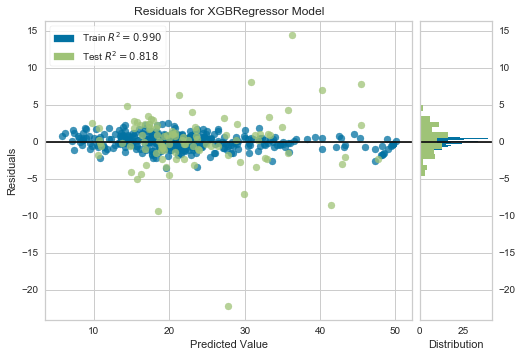

In [104]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xg_reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

### 잔차검증 
: 최종모형의 잔차검정 결과 모형의 선형성을 만족하는 것 외에 나머지 부분에서는 잔차검즘이 유의하지 않았다. 따라서 위에서 여러 통계량값이 유의다고 해서 모형 자체가 절대적으로 유의하다 확신할 수 없음을 알 수 있다.


#### 1. 모형의 선형성 
아래 잔차에서는 패턴이 존재하지 않고 거의 일직선의 형태를 띄었다. 이는 모형의 선형성을 만족했다는 결과이다. 


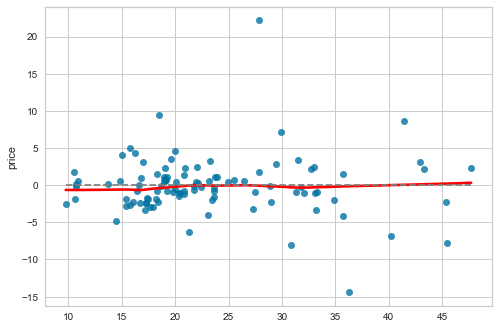

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

fitted = y_pred # 예측값 
residual = y_test - fitted  # 잔차=실제값-예측값 

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')


 #### 2. 잔차의 정규성 
: 잔차가 정규분포를 따른다는 가정 
-  p-= 0.0 로 유의수준 5%에서 잔차의 정규성은 위반되었다.

(0.8396612405776978, 3.888141808516821e-09)


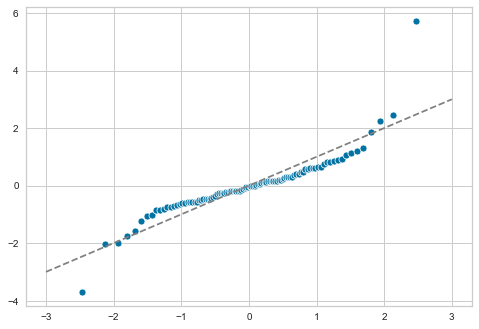

In [106]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
print(scipy.stats.shapiro(residual))


#### 3. 잔차의 등분산성 
:회귀모형을 통해 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 수평선을 그리지 못하므로 잔차의 등분산성은 만족하지 못한다.

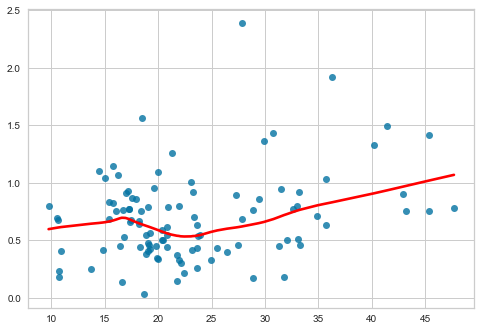

In [107]:
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

## 모델 개선 - 최적의 하이퍼 파라메타 적용 
### 교차검증 5회 
- booster=['gbtree','gblinear']
- base_score=[0.25,0.5,0.75,1]
- n_estimators = [100, 500, 900, 1100, 1500]
- max_depth = [2, 3, 5, 10, 15]
- booster=['gbtree','gblinear']
- learning_rate=[0.05,0.1,0.15,0.20]
- min_child_weight=[1,2,3,4]
- 의 각 파라메타의 조합을 5번씩 반복 실시

- 더 높은 성능을 위해, 하이퍼 파라메타 값을 조정하며, 모델을 개선시켰지만, 여전히 초기 설정한 모델의 성능이 제일 좋았다.

In [159]:
# 조절할 파라메타들의 값 
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
alpha=[0.001,0.01,0.1,0,1,10,100,100] 

###  최적의 파라메타 찾기

In [160]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'alpha':alpha
    }

grid_result = gs.fit(X_train, y_train)
best_params = grid_result.best_params_
print('best hyperparameters=',best_params )

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best hyperparameters= {'max_depth': 6, 'n_estimators': 10}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 개선된 모델 적합 

In [156]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   48.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:23:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 0, 1, 10,
                                                  100, 100],
                                        'base_scor

In [157]:
# 최적의 하이퍼 파라메타 
random_cv.best_estimator_

XGBRegressor(alpha=100, base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [167]:
# 최적의 하이퍼 파라메타를 모델에 적용 
import xgboost
regressor=xgboost.XGBRegressor(alpha=100, base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

regressor.fit(X_train,y_train)

[00:30:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=100, base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 개선된 모델 평가
- 최적으 하이퍼 파라메타를 적용한 결과 모델이 개선됨 
- train data의 결정계수는 1에 거의 가깝, test데이터는 0.7 
- 이전의 모델에서 train data의 결정계수는 0.99, test는 0.81 로 0.18차이에서 현재 0.3 차이로 차이가 많아짐,이렇게 차이가 많이 나게 되면 과적합 문제가 발생할 수 있으므로, 처음 모델을 채택하겠다.

In [171]:
y_pred = regressor.predict(X_test) # 예측값

print('mse=',mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmse=',rmse)

mse= 18.49460745880816
rmse= 4.3005357176528785


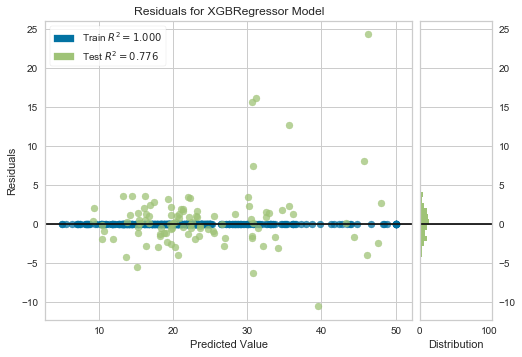

In [172]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()